## <font color=blue>Overview</font>
- This machine learning hands on experience is a part of a large-scale project under the title of:<br>
<font style="color:green; font-weight: bold;"> "Mathematical development and C++ implementation of a complex materials behavior for industrial applications"</font>

## <font color=blue>Problem Statement</font>
- As an introduction, it should be noted that there is a relation between initial content of element in alloys and their equilibrium content. To model materials behavior, we need the equilibrium content. Although it is possible to use some approximate methods to estimate the equilibrium contents, these techniques do not work in case of industrial applications where the materials are complex. 
    
- In order to model industrial application we really need a very high accuracy of equilibrium content as function of input variables. Because of this high accuracy requirement, the common approach is permanent connection to an external database for reading exact data. This dependency is very challenging since it causes computational load along with lack of flexibility and portability.

- But if we can find a solution to overcome this dependency while guarantee a high accuracy, it can be a game changer. Here is a place that <font style="color:green; font-weight: bold;"> we believed machine learning can be a turning point in our methodology.</font>

## <font color=blue>Methodology</font>
- To overcome these difficulties, first I have prepared <strong>CSV file dataset</strong> extracted from thermodynamics database. Then I have applied <strong>different machine learning algorithms</strong>. This approach is very accurate and helpful since the developed C++ model can run independently without requirement to any other libraries.
    
       
- This notebook includes the required python codes for applying the machine learning algorithms. It should be noted that the same application is done in the developed C++ model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

#Quality of image:
%config InlineBackend.figure_format = 'svg'
import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# For saving and loading machine learning model
import pickle

### Reading Files:
I have already prepared two CSV files by scripting inside a thermodynamics database.

In [2]:
dataDirectory = os.path.join(os.path.dirname(os.getcwd()),'Matcalc\\data')
imageDirectory = os.path.join(os.path.dirname(os.getcwd()),'Matcalc\\images')
modelDirectory = os.path.join(os.path.dirname(os.getcwd()),'Matcalc\\model')

In [3]:
df_train = pd.read_csv(dataDirectory + "\\AlMgSi_train.csv")
df_test = pd.read_csv(dataDirectory + "\\AlMgSi_test.csv")

In [4]:
print(df_train.shape)
print(df_test.shape)

(44399, 5)
(1799, 5)


In [5]:
# Renaming column names:
df_train.columns = ['Temperature', 'Magnesium_input', 'Silicone_input', 'Magnesium_output', 'Silicone_output']
df_test.columns = ['Temperature', 'Magnesium_input', 'Silicone_input', 'Magnesium_output', 'Silicone_output']
df_train.head(3)

,Temperature,Magnesium_input,Silicone_input,Magnesium_output,Silicone_output
0,25,1.000000e-07,0.000001,4.070000e-08,9.700000e-07
1,25,1.000000e-07,0.000005,1.720000e-08,5.460000e-06
2,25,1.000000e-07,0.000010,1.270000e-08,9.960000e-06


### Input variables:
There are three input independent variables which are:
- Temperature (kelvin)
- Magnesium_input (concentration of Mg in the alloy)
- Silicone_input (concentration of Si in the alloy)

### Target variables:
There are two target variables which are:
- Magnesium_output (concentration of Mg based on thermodynamic database)
- Silicone_output (concentration of Si based on thermodynamic database)

### Goal:
Prediction of target variables using input features by reducing the MSE as the evaluation metric.

In [6]:
X_train = df_train.iloc[:, 0:3]
y_train_Mg = df_train['Magnesium_output']
y_train_Si = df_train['Silicone_output']

X_test = df_test.iloc[:, 0:3]
y_test_Mg = df_test['Magnesium_output']
y_test_Si = df_test['Silicone_output']

In [7]:
models_Mg = pd.DataFrame(index = ['MSE', 'Minimum'], columns = ['LR', 'RF', 'KNN', 'XGBoost'])
models_Si = pd.DataFrame(index = ['MSE', 'Minimum'], columns = ['LR', 'RF', 'KNN', 'XGBoost'])
models_Mg

,LR,RF,KNN,XGBoost
MSE,NaN,NaN,NaN,NaN
Minimum,NaN,NaN,NaN,NaN


In [8]:
print(X_train.shape)
print(X_test.shape)

(44399, 3)
(1799, 3)


In [9]:
# Keeping a copy from X_train and X_test before applying scaler:
X_train_source = X_train
X_test_source = X_test

# Applying Scaler:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =scaler.transform(X_test)

In [10]:
lr_Mg = LinearRegression()
lr_Si = LinearRegression()
lr_Mg.fit(X_train, y_train_Mg)
lr_Si.fit(X_train, y_train_Si)

y_pred_Mg = lr_Mg.predict(X_test)
y_pred_Si = lr_Si.predict(X_test)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models_Mg.loc[:, 'LR'] = [error_Mg, minimum_Mg] 
models_Si.loc[:, 'LR'] = [error_Si, minimum_Si] 

In [11]:
rf_Mg = RandomForestRegressor()
rf_Si = RandomForestRegressor()
rf_Mg.fit(X_train, y_train_Mg)
rf_Si.fit(X_train, y_train_Si)

y_pred_Mg = rf_Mg.predict(X_test)
y_pred_Si = rf_Si.predict(X_test)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models_Mg.loc[:, 'RF'] = [error_Mg, minimum_Mg] 
models_Si.loc[:, 'RF'] = [error_Si, minimum_Si] 

In [12]:
knn_Mg = KNeighborsRegressor()
knn_Si = KNeighborsRegressor()
knn_Mg.fit(X_train, y_train_Mg)
knn_Si.fit(X_train, y_train_Si)

y_pred_Mg = knn_Mg.predict(X_test)
y_pred_Si = knn_Si.predict(X_test)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models_Mg.loc[:, 'KNN'] = [error_Mg, minimum_Mg] 
models_Si.loc[:, 'KNN'] = [error_Si, minimum_Si] 

In [13]:
xgboost_Mg = XGBRegressor()
xgboost_Si = XGBRegressor()
xgboost_Mg.fit(X_train, y_train_Mg)
xgboost_Si.fit(X_train, y_train_Si)

y_pred_Mg = xgboost_Mg.predict(X_test)
y_pred_Si = xgboost_Si.predict(X_test)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models_Mg.loc[:, 'XGBoost'] = [error_Mg, minimum_Mg] 
models_Si.loc[:, 'XGBoost'] = [error_Si, minimum_Si] 

In [14]:
models_Mg

,LR,RF,KNN,XGBoost
MSE,0.000002,4.630493e-08,6.868077e-09,2.594546e-08
Minimum,-0.003394,8.851789e-05,3.662000e-09,-6.576149e-05


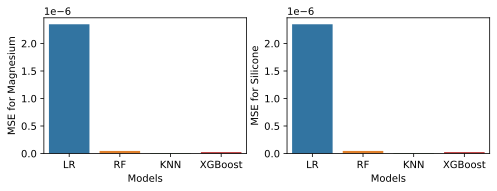

In [15]:
xLst = models_Mg.columns
yLstMg = models_Mg.loc['MSE', :]
yLstSi = models_Mg.loc['MSE', :]

fig, axes = plt.subplots(1, 2, figsize=(8,2.5))
sns.barplot(x=xLst, y=yLstMg, ax = axes[0])
axes[0].set_xlabel('Models', size = 10)
axes[0].set_ylabel('MSE for Magnesium', size = 10);

sns.barplot(x=xLst, y=yLstSi, ax = axes[1])
axes[1].set_xlabel('Models', size = 10)
axes[1].set_ylabel('MSE for Silicone', size = 10);

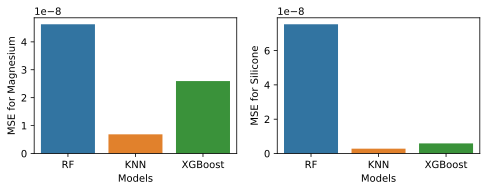

In [16]:
xLst = models_Mg.columns[1:]
yLstMg = models_Mg.loc['MSE', :].values[1:]
yLstSi = models_Si.loc['MSE', :].values[1:]

fig, axes = plt.subplots(1, 2, figsize=(8,2.5))
sns.barplot(x=xLst, y=yLstMg, ax = axes[0])
axes[0].set_xlabel('Models', size = 10)
axes[0].set_ylabel('MSE for Magnesium', size = 10);

sns.barplot(x=xLst, y=yLstSi, ax = axes[1])
axes[1].set_xlabel('Models', size = 10)
axes[1].set_ylabel('MSE for Silicone', size = 10);


#plt.xticks(rotation=90);
plt.savefig(imageDirectory + "\\model_comparison.png", dpi=140,  bbox_inches='tight')

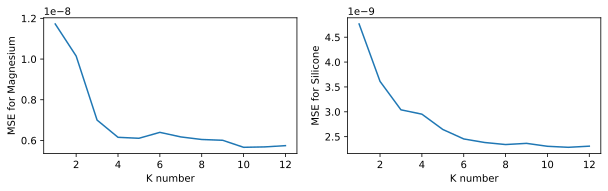

In [17]:
kLst = [i for i in range(1,13)]
count = len(kLst)
mseMgLst = [0]*count;
mseSiLst = [0]*count;
minMgLst = [0]*count;
minSiLst = [0]*count;
for k in kLst:
    knn_Mg = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_Si = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_Mg.fit(X_train, y_train_Mg)
    knn_Si.fit(X_train, y_train_Si)

    y_pred_Mg = knn_Mg.predict(X_test)
    y_pred_Si = knn_Si.predict(X_test)
    mseMgLst[k-1] = mean_squared_error(y_test_Mg, y_pred_Mg)
    mseSiLst[k-1] = mean_squared_error(y_test_Si, y_pred_Si)
    minMgLst[k-1] = y_pred_Mg.min()
    minSiLst[k-1] = y_pred_Si.min()

    
fig, axes = plt.subplots(1, 2, figsize=(10,2.5))
sns.lineplot(x=kLst, y=mseMgLst, ax = axes[0])
axes[0].set_xlabel('K number', size = 10)
axes[0].set_ylabel('MSE for Magnesium', size = 10);

sns.lineplot(x=kLst, y=mseSiLst, ax = axes[1])
axes[1].set_xlabel('K number', size = 10)
axes[1].set_ylabel('MSE for Silicone', size = 10);


#plt.xticks(rotation=90);
plt.savefig(imageDirectory + "\\KNN.png", dpi=140,  bbox_inches='tight')

### Insight:
- The minimum MSE for Magnesium is obtained when K=10. By the way, after k=4 the reducing in MSE is not very strong. To prevent complex model, k is selected as 4 for Magnesium.
- The minimum MSE for Silicone is obtained when K=11. By the way, after k=8 the reducing in MSE is not very strong. To prevent complex model, k is selected as 8 for Silicone.

In [18]:
scoreBaseMg = models_Mg.loc['MSE', 'KNN']
scoreFinalMg = mseMgLst[3]

scoreBaseSi = models_Si.loc['MSE', 'KNN']
scoreFinalSi = mseSiLst[7]

lst1 = ['Base_Model', 'Optimized_Model']
lstMg = [scoreBaseMg, scoreFinalMg]
lstSi = [scoreBaseSi, scoreFinalSi]

In [19]:
improvementMg = round(100*(scoreBaseMg - scoreFinalMg)/scoreBaseMg,2)
improvementSi = round(100*(scoreBaseSi - scoreFinalSi)/scoreBaseSi,2)

print("The improvement in business metric for Mg: {}%".format(improvementMg))
print("The improvement in business metric for Si: {}%".format(improvementSi))

The improvement in business metric for Mg: 10.41%
The improvement in business metric for Si: 15.96%


C:\Users\TONAS\.conda\envs\myland\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\TONAS\.conda\envs\myland\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


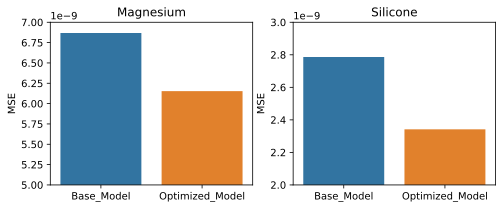

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
sns.barplot(lst1, lstMg, ax=axes[0])
axes[0].set_title('Magnesium')
#axes[0].set_xlabel('Models')
axes[0].set_ylabel('MSE');
axes[0].set(ylim=(5.0e-9, 7.0e-9))


sns.barplot(lst1, lstSi, ax=axes[1])
axes[1].set_title('Silicone')
#axes[1].set_xlabel('Models')
axes[1].set_ylabel('MSE');
axes[1].set(ylim=(2.0e-9, 3.0e-9))

plt.savefig(imageDirectory + '\\optimization.png', dpi=140,  bbox_inches='tight')

### Question: 
- Can polynomial features help us to reduce MSE?

In [21]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True) 
X_tr = pd.DataFrame(polyfeat.fit_transform(X_train))
X_te = pd.DataFrame(polyfeat.transform(X_test))
X_tr.columns = polyfeat.get_feature_names()
X_te.columns = polyfeat.get_feature_names()
X_te.head(2)

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2,x0^3,x0^2 x1,x0^2 x2,x0 x1^2,x0 x1 x2,x0 x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3
0,1.0,-1.453133,1.431023,0.938308,2.111595,-2.079466,-1.363486,2.047826,1.342740,0.880422,-3.068428,3.02174,1.981327,-2.975763,-1.951180,-1.279370,2.930486,1.921492,1.259904,0.826107
1,1.0,-1.453133,1.431023,0.367680,2.111595,-2.079466,-0.534288,2.047826,0.526159,0.135189,-3.068428,3.02174,0.776392,-2.975763,-0.764578,-0.196447,2.930486,0.752945,0.193458,0.049706


In [22]:
X_tr.drop('1', axis=1, inplace=True)
X_te.drop('1', axis=1, inplace=True)
X_te.head(2)

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2,x0^3,x0^2 x1,x0^2 x2,x0 x1^2,x0 x1 x2,x0 x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3
0,-1.453133,1.431023,0.938308,2.111595,-2.079466,-1.363486,2.047826,1.342740,0.880422,-3.068428,3.02174,1.981327,-2.975763,-1.951180,-1.279370,2.930486,1.921492,1.259904,0.826107
1,-1.453133,1.431023,0.367680,2.111595,-2.079466,-0.534288,2.047826,0.526159,0.135189,-3.068428,3.02174,0.776392,-2.975763,-0.764578,-0.196447,2.930486,0.752945,0.193458,0.049706


In [23]:
models2_Mg = pd.DataFrame(index = ['MSE', 'Minimum'], columns = ['LR', 'RF', 'KNN', 'XGBoost'])
models2_Si = pd.DataFrame(index = ['MSE', 'Minimum'], columns = ['LR', 'RF', 'KNN', 'XGBoost'])
models2_Mg

,LR,RF,KNN,XGBoost
MSE,NaN,NaN,NaN,NaN
Minimum,NaN,NaN,NaN,NaN


In [24]:
lr_Mg = LinearRegression()
lr_Si = LinearRegression()
lr_Mg.fit(X_tr, y_train_Mg)
lr_Si.fit(X_tr, y_train_Si)

y_pred_Mg = lr_Mg.predict(X_te)
y_pred_Si = lr_Si.predict(X_te)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models2_Mg.loc[:, 'LR'] = [error_Mg, minimum_Mg] 
models2_Si.loc[:, 'LR'] = [error_Si, minimum_Si] 

In [25]:
rf_Mg = RandomForestRegressor()
rf_Si = RandomForestRegressor()
rf_Mg.fit(X_tr, y_train_Mg)
rf_Si.fit(X_tr, y_train_Si)

y_pred_Mg = rf_Mg.predict(X_te)
y_pred_Si = rf_Si.predict(X_te)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models2_Mg.loc[:, 'RF'] = [error_Mg, minimum_Mg] 
models2_Si.loc[:, 'RF'] = [error_Si, minimum_Si] 

In [26]:
knn_Mg = KNeighborsRegressor()
knn_Si = KNeighborsRegressor()
knn_Mg.fit(X_tr, y_train_Mg)
knn_Si.fit(X_tr, y_train_Si)

y_pred_Mg = knn_Mg.predict(X_te)
y_pred_Si = knn_Si.predict(X_te)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models2_Mg.loc[:, 'KNN'] = [error_Mg, minimum_Mg] 
models2_Si.loc[:, 'KNN'] = [error_Si, minimum_Si] 
models2_Mg

,LR,RF,KNN,XGBoost
MSE,1.001168e-07,9.024959e-08,6.047665e-09,NaN
Minimum,-7.208397e-04,1.088033e-04,4.070000e-09,NaN


In [27]:
xgboost_Mg = XGBRegressor()
xgboost_Si = XGBRegressor()
xgboost_Mg.fit(X_tr, y_train_Mg)
xgboost_Si.fit(X_tr, y_train_Si)

y_pred_Mg = xgboost_Mg.predict(X_te)
y_pred_Si = xgboost_Si.predict(X_te)
error_Mg = mean_squared_error(y_test_Mg, y_pred_Mg)
error_Si = mean_squared_error(y_test_Si, y_pred_Si)
minimum_Mg = y_pred_Mg.min()
minimum_Si = y_pred_Si.min()

models2_Mg.loc[:, 'XGBoost'] = [error_Mg, minimum_Mg] 
models2_Si.loc[:, 'XGBoost'] = [error_Si, minimum_Si] 

In [28]:
models_Mg

,LR,RF,KNN,XGBoost
MSE,0.000002,4.630493e-08,6.868077e-09,2.594546e-08
Minimum,-0.003394,8.851789e-05,3.662000e-09,-6.576149e-05


In [29]:
models2_Mg

,LR,RF,KNN,XGBoost
MSE,1.001168e-07,9.024959e-08,6.047665e-09,2.233900e-08
Minimum,-7.208397e-04,1.088033e-04,4.070000e-09,-8.895408e-05


In [30]:
result = pd.DataFrame(index=['Without_Polynomial', 'With_Polynomial'], columns=['LR', 'RF', 'KNN', 'XGBoost'])
result.loc['Without_Polynomial'] = models_Mg.loc['MSE']
result.loc['With_Polynomial'] = models2_Mg.loc['MSE']
result

,LR,RF,KNN,XGBoost
Without_Polynomial,2.35001e-06,4.63049e-08,6.86808e-09,2.59455e-08
With_Polynomial,1.00117e-07,9.02496e-08,6.04766e-09,2.2339e-08


In [31]:
result_transposed = result.T
result_transposed

,Without_Polynomial,With_Polynomial
LR,2.35001e-06,1.00117e-07
RF,4.63049e-08,9.02496e-08
KNN,6.86808e-09,6.04766e-09
XGBoost,2.59455e-08,2.2339e-08


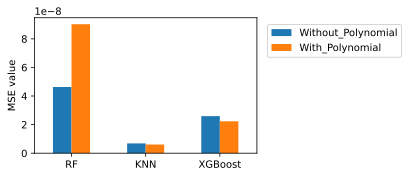

In [32]:
fig, ax = plt.subplots(figsize=(4,2.5))
result_transposed.loc[['RF', 'KNN', 'XGBoost']].plot(kind='bar', ax = ax);
#ax.set_xlabel('Models', size = 10)
ax.set_ylabel('MSE value', size = 10);
plt.xticks(rotation=0);

ax.legend(bbox_to_anchor=(1.65,0.95), loc='upper right', borderaxespad=0)
plt.savefig(imageDirectory + "\\polynomial.png", dpi=140,  bbox_inches='tight')

### Insight:
- Except for random forest model, the polynomial features could improve the MSE for all other three models.
- By the way, the improvement in the KNN model as the best model is very little. 
- By considering the tradeoff between complexity of the models and improvement of the business metric, it is decided to continue by ignoring the polynomial features.

### Saving the best model for future use:

In [33]:
knn_Mg = KNeighborsRegressor(n_neighbors=4)
knn_Si = KNeighborsRegressor(n_neighbors=8)
knn_Mg.fit(X_train, y_train_Mg)
knn_Si.fit(X_train, y_train_Si)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [34]:
# Saving model to disk:
fileNameMg = modelDirectory + "\\knn_Mg_Model.sav"
fileNameSi = modelDirectory + "\\knn_Si_Model.sav"
pickle.dump(knn_Mg, open(fileNameMg, 'wb'))
pickle.dump(knn_Si, open(fileNameSi, 'wb'))